In [38]:
import pandas as pd

df = pd.read_csv("files/preprocessed_bank.csv", sep=',')
df.head()

,Unnamed: 0,Возраст,Работа,Семейный статус,Образование,Кредитный дефолт,Ипотека,Займ,Контакт,Месяц,...,Кампания,День,Предыдущий контакт,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y
0,0,27,Самозанятый,Не женат / не замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,...,1,NaN,0,NaN,-0.1,93.798,-40.4,5.045,5195.8,Нет
1,1,30,Преддприниматель,Женат / замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,...,1,NaN,0,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да
2,2,39,Менеджер,Женат / замужем,Базовое,Нет,Нет,Нет,Городской телефон,Октябрь,...,1,NaN,0,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да
3,3,42,Менеджер,Женат / замужем,Высшая школа,Нет,Да,Да,Городской телефон,Октябрь,...,1,NaN,0,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да
4,4,42,Самозанятый,Женат / замужем,Неполное базовое,Нет,Нет,Нет,Городской телефон,Октябрь,...,1,NaN,0,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да


In [4]:
df.dtypes

Unnamed: 0                              int64
Возраст                                 int64
Работа                                 object
Семейный статус                        object
Образование                            object
Кредитный дефолт                       object
Займ                                   object
Контакт                                object
Месяц                                  object
День недели                            object
Длительность                          float64
Кампания                                int64
День                                  float64
Предыдущий контакт                      int64
Доходность                            float64
Колебание уровня безработицы          float64
Индекс потребительских цен            float64
Индекс потребительской уверенности    float64
Европейская межбанковская ставка      float64
Количество сотрудников в компании     float64
y                                      object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          41188 non-null  int64  
 1   Возраст                             41188 non-null  int64  
 2   Работа                              41188 non-null  object 
 3   Семейный статус                     41188 non-null  object 
 4   Образование                         41188 non-null  object 
 5   Кредитный дефолт                    41188 non-null  object 
 6   Займ                                41188 non-null  object 
 7   Контакт                             41188 non-null  object 
 8   Месяц                               41188 non-null  object 
 9   День недели                         41188 non-null  object 
 10  Длительность                        41186 non-null  float64
 11  Кампания                            41188

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np

C:\Users\ngorb\AppData\Local\Temp\ipykernel_23344\3200063295.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(df.Возраст.dropna())


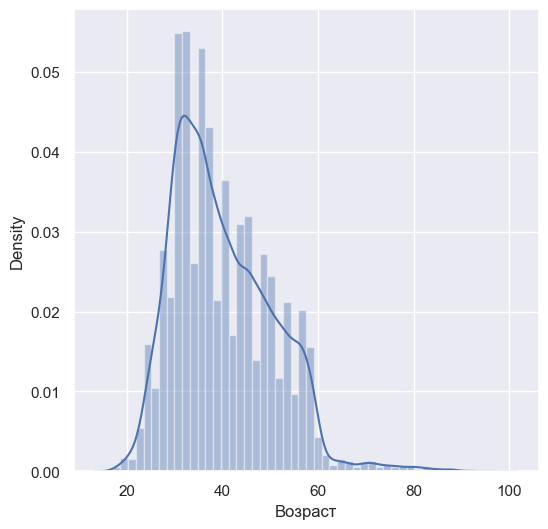

In [40]:
%matplotlib inline
sns.set(color_codes=True)
plot = sns.distplot(df.Возраст.dropna())
plot.figure.set_size_inches(6,6)

In [41]:
df['Работа'].value_counts(dropna=False)

Работа
Менеджер                  22600
Техник                     6743
Обслуживающий персонал     3969
Самозанятый                2435
Пенсионер                  1720
Преддприниматель           1456
Домохозяйка                1060
Студент                     875
Неизвестно                  330
Name: count, dtype: int64

In [42]:
df['Работа'] = df['Работа'].map({'Менеджер': 0,
                                 'Техник':1,
                                 'Обслуживающий персонал':2,
                                 'Самозанятый':3,
                                 'Пенсионер':4,
                                 'Преддприниматель':5,
                                 'Домохозяйка':6,
                                 'Студент':7,
                                 'Неизвестно':8,
                                 'Самозанятый':9})

In [43]:
df['Месяц'].value_counts(dropna=False)

Месяц
Май         13769
Июль         7174
Август       6178
Июнь         5318
Ноябрь       4101
Апрель       2632
Октябрь       718
Сентябрь      570
Март          546
Декабрь       182
Name: count, dtype: int64

In [34]:
df['Месяц'] = df['Месяц'].map({'Январь':1,
                                 'Февраль':1,
                                 'Март':2,
                                 'Апрель':2,
                                 'Май':2,
                                 'Июнь':3,
                                 'Июль':3,
                                 'Август':3,
                                 'Сентябрь':4,
                                 'Октябрь':4,
                                 'Ноябрь':4,
                               'Декабрь':1})

In [35]:
df['Образование'].value_counts(dropna=False)

Образование
Университетская степень    12168
Высшая школа                9515
Неполное базовое            6468
Базовое                     6045
Профессиональный курс       5243
Неизвестно                  1731
Неграмотный                   18
Name: count, dtype: int64

In [36]:
df['Месяц'] = df['Месяц'].map({'Университетская степень':3,
                                 'Высшая школа':3,
                                 'Базовое':1,
                                 'Апрель':2,
                                 'Профессиональный курс':2,
                                 'Неполное базовое':1,
                                 'Неполное базовое':1,
                                 'Неизвестно':4,
                                 'Неграмотный':4})

In [ ]:
df['Ипотека'].value_counts(dropna=False)

In [45]:
df['Ипотека'] = df['Ипотека'].map({'Да': 0,
                                 'Нет':1,
                                 'Неизвестно':2})

C:\Users\ngorb\AppData\Local\Temp\ipykernel_23344\3371364907.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(df['Ипотека'].dropna())


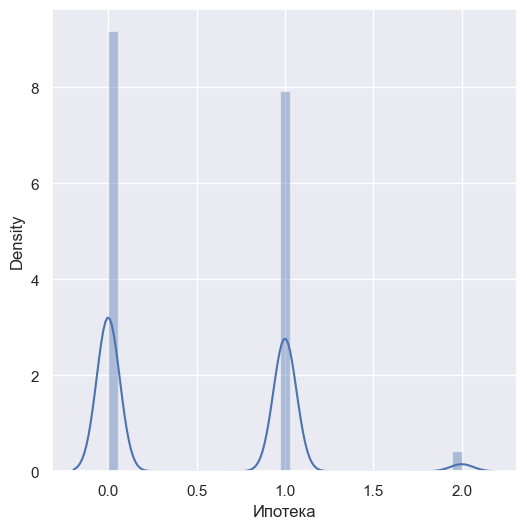

In [46]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
plot = sns.distplot(df['Ипотека'].dropna())
plot.figure.set_size_inches(6,6)

In [47]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['Займ'])
label_encoder.transform(df['Займ'])

array([2, 2, 2, ..., 2, 2, 0], shape=(41188,))

In [48]:
import pandas as pd
pd.get_dummies(df, columns=["Займ"],
prefix=["Займ"]).head()

,Unnamed: 0,Возраст,Работа,Семейный статус,Образование,Кредитный дефолт,Ипотека,Контакт,Месяц,День недели,...,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y,Займ_Да,Займ_Неизвестно,Займ_Нет
0,0,27,9,Не женат / не замужем,Университетская степень,Нет,1,Городской телефон,Октябрь,Пятница,...,NaN,-0.1,93.798,-40.4,5.045,5195.8,Нет,False,False,True
1,1,30,5,Женат / замужем,Университетская степень,Нет,1,Городской телефон,Октябрь,Пятница,...,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да,False,False,True
2,2,39,0,Женат / замужем,Базовое,Нет,1,Городской телефон,Октябрь,Пятница,...,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да,False,False,True
3,3,42,0,Женат / замужем,Высшая школа,Нет,0,Городской телефон,Октябрь,Пятница,...,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да,True,False,False
4,4,42,9,Женат / замужем,Неполное базовое,Нет,1,Городской телефон,Октябрь,Пятница,...,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да,False,False,True


In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
ct=OneHotEncoder()
ct_res=ct.fit_transform(df[['Займ']])

In [50]:
ct_res.toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], shape=(41188, 3))

In [51]:
pd.DataFrame(ct_res.toarray(), columns=ct.categories_).head()

,Да,Неизвестно,Нет
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [52]:
df = df.join(pd.DataFrame(ct_res.toarray(),
columns=ct.categories_))
df.head()

,Unnamed: 0,Возраст,Работа,Семейный статус,Образование,Кредитный дефолт,Ипотека,Займ,Контакт,Месяц,...,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y,"(Да,)","(Неизвестно,)","(Нет,)"
0,0,27,9,Не женат / не замужем,Университетская степень,Нет,1,Нет,Городской телефон,Октябрь,...,NaN,-0.1,93.798,-40.4,5.045,5195.8,Нет,0.0,0.0,1.0
1,1,30,5,Женат / замужем,Университетская степень,Нет,1,Нет,Городской телефон,Октябрь,...,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да,0.0,0.0,1.0
2,2,39,0,Женат / замужем,Базовое,Нет,1,Нет,Городской телефон,Октябрь,...,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да,0.0,0.0,1.0
3,3,42,0,Женат / замужем,Высшая школа,Нет,0,Да,Городской телефон,Октябрь,...,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да,1.0,0.0,0.0
4,4,42,9,Женат / замужем,Неполное базовое,Нет,1,Нет,Городской телефон,Октябрь,...,NaN,-0.1,93.798,-40.4,5.045,5195.8,Да,0.0,0.0,1.0


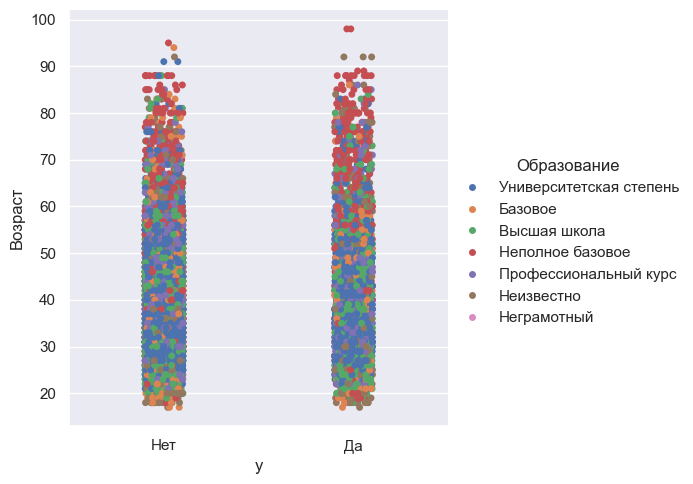

In [53]:
sns.catplot(x="y", y="Возраст", hue="Образование", data=df)

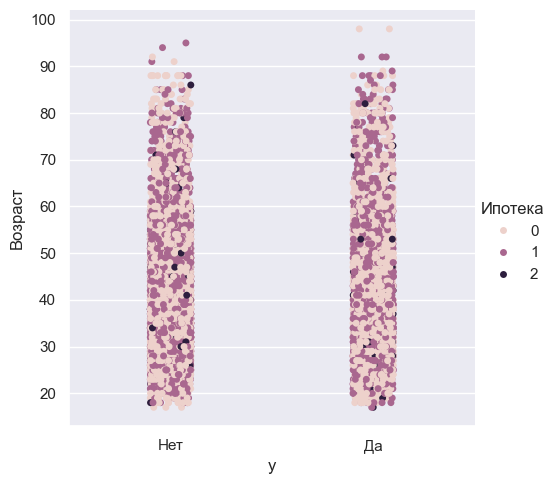

In [54]:
sns.catplot(x="y", y="Возраст", hue="Ипотека", data=df)

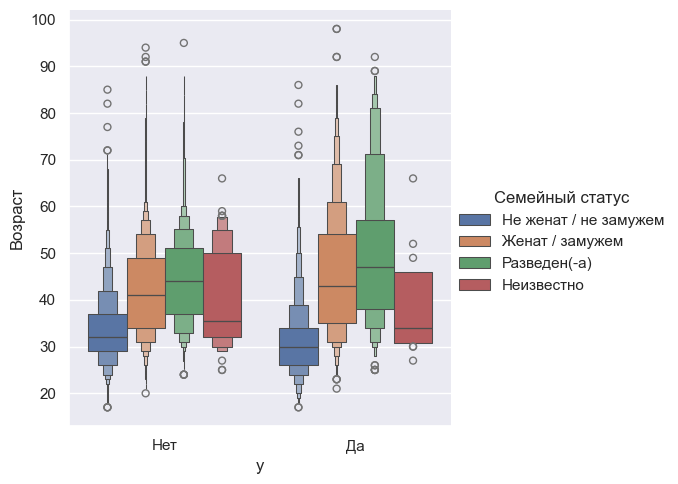

In [56]:
sns.catplot(x="y", y="Возраст", kind="boxen",data=df,hue="Семейный статус")

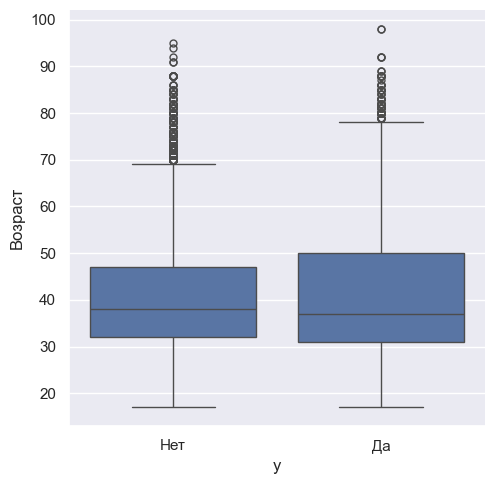

In [57]:
sns.catplot(x="y", y="Возраст", kind="box",data=df)

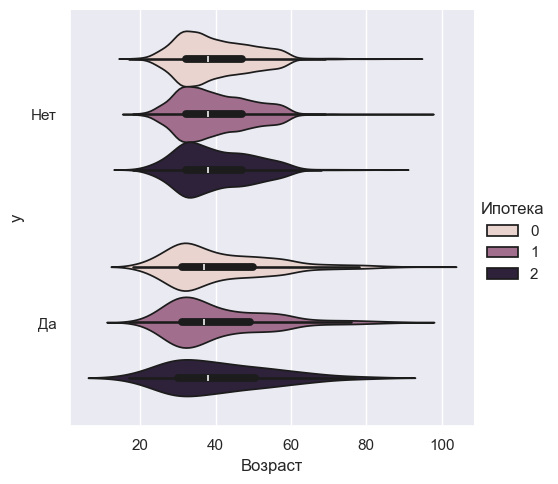

In [58]:
sns.catplot(x="Возраст", y="y", hue="Ипотека", kind="violin", data=df)

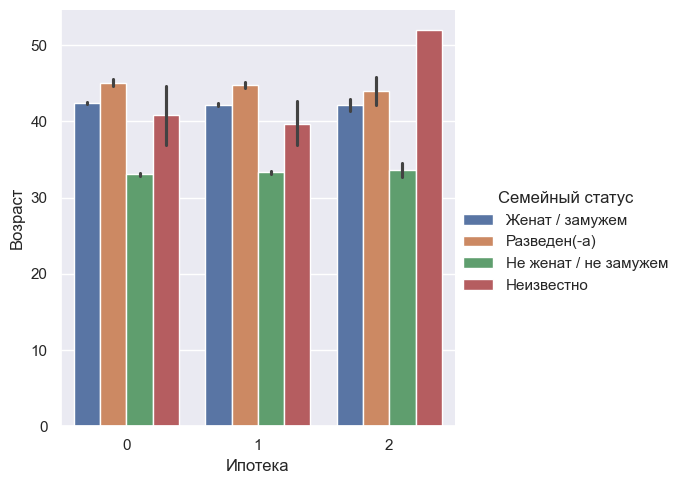

In [59]:
sns.catplot(x="Ипотека", y="Возраст", hue="Семейный статус", kind="bar",data=df)

C:\Users\ngorb\AppData\Local\Temp\ipykernel_23344\4230777578.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Образование", kind="count", palette="ch:.25",data=df)


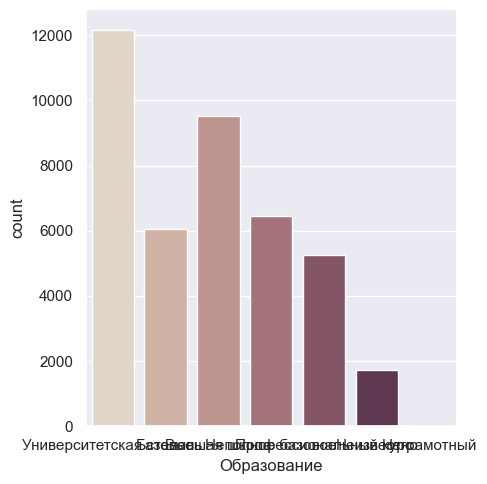

In [60]:
sns.catplot(x="Образование", kind="count", palette="ch:.25",data=df)